In [12]:
import numpy as np
#Argmax: Returns the indices of the maximum values along an axis.
a = np.arange(9).reshape(3,3)
print(a)
np.argmax(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


8

In [13]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [14]:
import scipy.misc
scipy.misc.imsave('outfile.jpg', a)

/home/yifan/anaconda2/envs/tf3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [16]:
import imageio
a = a.astype('uint8')
imageio.imwrite('outfile.jpg', a)

In [28]:
a = np.array((1,2,3))
b = np.array((2,3,4))
in_a = set(a)
in_b = set(b)
in_b_but_not_in_a = in_b - in_a
# print(in_b_but_not_in_a)
array = np.array(list(in_b_but_not_in_a))
# print(array.dtype)
result =np.concatenate((a,array))
print(result)

[1 2 3 4]


In [13]:
a = np.random.rand(10,256,256,20)
a.shape

(10, 256, 256, 20)

In [14]:
b = np.argmax(a, axis = -1)

In [15]:
print(b.shape)

(10, 256, 256)


In [ ]:
#if you don't want to do data augmentation, set data_gen_args as an empty dict.
#data_gen_args = dict()

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGenerator = trainGenerator(20,'data/membrane/train','image','label',data_gen_args,save_to_dir = "data/membrane/train/aug")

In [ ]:
load_data(...)

In [1]:
from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)

# load your data
x_train, y_train, x_val, y_val = load_data(...)

# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

# define model
model = Unet(BACKBONE)
model.compile('Adam', loss=bce_jaccard_loss, metrics=[iou_score])

# fit model
# if you use data generator use model.fit_generator(...) instead of model.fit(...)
# more about `fit_generator` here: https://keras.io/models/sequential/#fit_generator
model.fit(
    x=x_train,
    y=y_train,
    batch_size=16,
    epochs=100,
    validation_data=(x_val, y_val),
)

Using TensorFlow backend.
/home/yifan/anaconda2/envs/tf3.6/lib/python3.6/site-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


NameError: name 'load_data' is not defined

In [28]:
import numpy as np
nb_classes = 6
data = [[2, 3, 4, 0],[1,2,3,4]]
data = np.array(data)
print(data.shape)

def indices_to_one_hot(data, shape, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets].reshape((shape[0],shape[1],nb_classes))

(2, 4)


In [29]:
result = np.eye(nb_classes)[data]

In [33]:
print(result[0,0])

[0. 0. 1. 0. 0. 0.]


In [24]:
print(a.shape)

(2, 4, 20)


In [10]:
print(a.reshape((4,2,20)))

[[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


# Vis Results

In [1]:
import os
result_path = '/media/exfat/yifan/rf_results/cityscapes_unet_100e/'
results = os.listdir(result_path)
print(results)


['aachen_000000_000019_A.jpg', 'aachen_000000_000019_B_color_gt.jpg', 'aachen_000000_000019_B_color_pred.jpg', 'aachen_000000_000019_B_trainId_gt.jpg', 'aachen_000000_000019_B_trainId_pred.jpg', 'aachen_000001_000019_A.jpg', 'aachen_000001_000019_B_color_gt.jpg', 'aachen_000001_000019_B_color_pred.jpg', 'aachen_000001_000019_B_trainId_gt.jpg', 'aachen_000001_000019_B_trainId_pred.jpg', 'aachen_000002_000019_A.jpg', 'aachen_000002_000019_B_color_gt.jpg', 'aachen_000002_000019_B_color_pred.jpg', 'aachen_000002_000019_B_trainId_gt.jpg', 'aachen_000002_000019_B_trainId_pred.jpg', 'aachen_000003_000019_A.jpg', 'aachen_000003_000019_B_color_gt.jpg', 'aachen_000003_000019_B_color_pred.jpg', 'aachen_000003_000019_B_trainId_gt.jpg', 'aachen_000003_000019_B_trainId_pred.jpg', 'aachen_000004_000019_A.jpg', 'aachen_000004_000019_B_color_gt.jpg', 'aachen_000004_000019_B_color_pred.jpg', 'aachen_000004_000019_B_trainId_gt.jpg', 'aachen_000004_000019_B_trainId_pred.jpg', 'aachen_000005_000019_A.jpg',

aachen_000000_000019_B_color_pred.jpg aachen_000000_000019_B_color_gt.jpg


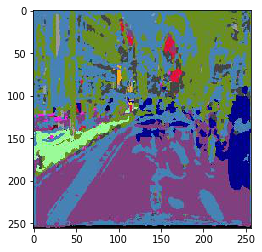

In [12]:
import imageio
import matplotlib.pyplot as plt 
import numpy as np

i = 0
print(results[4*i+2],results[4*i+1])

img_pred = imageio.imread(os.path.join(result_path, results[4*i+2]))
img_gt = imageio.imread(os.path.join(result_path, results[4*i+1]))
# print(np.unique(img))
# img = imageio.imread(os.path.join(mask_test_path, masks[i]))
plt.imshow(img_pred)
# plt.imshow(img_gt)

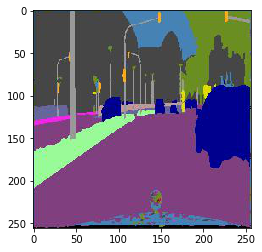

In [13]:
plt.imshow(img_gt.astype(int))

# Inspect Data

In [142]:
# data path
dataset_path = '/home/yifan/Github/segmentation_train/dataset/gtFine/test/'
mask_test_path = dataset_path + 'berlin'

In [154]:
import os
import numpy as np
masks = os.listdir(mask_test_path)
masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])
# print(masks)

berlin_000002_000019_gtFine_labelIds.png
[0 1 3]


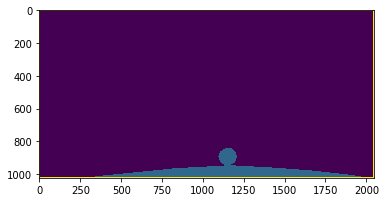

In [166]:
# trainId_mask = np.load(os.path.join(mask_test_path, masks[0]))
# print(trainId_mask.shape)
i = 10
print(masks[i])

# img = plt.imread(os.path.join(mask_test_path, masks[i]))
img = imageio.imread(os.path.join(mask_test_path, masks[i]))
print(np.unique(img))
# img = imageio.imread(os.path.join(mask_test_path, masks[i]))
plt.imshow(img)

In [16]:
print(trainId_mask)

[[19 19 19 ... 19 19 19]
 [19 19 19 ... 19 19 19]
 [19 19 19 ... 19 19 19]
 ...
 [19 19 19 ... 19 19 19]
 [19 19 19 ... 19 19 19]
 [19 19 19 ... 19 19 19]]


In [24]:
# data path
dataset_path = '/home/yifan/Github/segmentation_train/dataset/cityscapes_all/'
mask_path = dataset_path + 'gtFine_256/'
mask_test_path = mask_path + 'train'

In [25]:
import os
import numpy as np
import imageio
import re
masks = os.listdir(mask_test_path)
masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])

In [26]:
print(masks[0], masks[1], masks[2], masks[3])

cologne_000113_000019_gtFine_trainIds.npy cologne_000114_000019_gtFine_trainIds.npy cologne_000115_000019_gtFine_trainIds.npy cologne_000116_000019_gtFine_trainIds.npy


In [27]:
print(masks[12])

cologne_000125_000019_gtFine_trainIds.npy


In [111]:
imageio.imwrite('berlin_000000_000019_gtFine_color.png', img)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


cologne_000113_000019_gtFine_trainIds.npy
(256, 256)
[ 0  1  2  5  6  7  8  9 10 11 13 19]


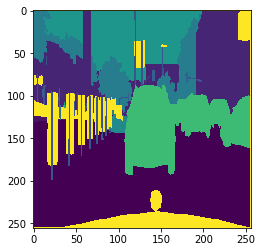

In [20]:
import matplotlib.pyplot as plt 
i = 0
print(masks[i])
# img = plt.imread(os.path.join(mask_test_path, masks[i]))
img = np.load(os.path.join(mask_test_path, masks[i]))
print(img.shape)
print(np.unique(img))
plt.imshow(img)

In [21]:
from dataGenerator import palette
img = np.where(img==19, 255, img)
color_gt = palette(img)
# print(color_gt)

Using TensorFlow backend.


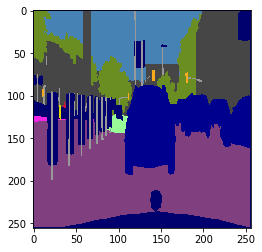

In [22]:
plt.imshow(color_gt.astype(int))

In [23]:
imageio.imwrite('savecolor.png',color_gt.astype('uint8'))

In [180]:
import os,re

In [14]:
#move 700 of the train to test
dataset_path = '/home/yifan/Github/segmentation_train/dataset/cityscapes_all/'
mask_path = dataset_path + 'gtFine_256/train'
frame_path = dataset_path + 'left_256/train'

masks = os.listdir(mask_path)
masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])
frames = os.listdir(frame_path)
frames.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])


In [16]:
for i in range(699):
    new_mask_path = dataset_path + 'gtFine_256/test'
    new_frame_path = dataset_path + 'left_256/test'
    #move mask
#     print(masks[i], frames[i])
#     assert(masks[i][] == frames[i]),"Colder than absolute zero!"
#     src = os.path.join(mask_path, frames[i])
#     print(src)
#     dst = os.path.join(new_mask_path, frames[i])
#     print(dst)
#     os.rename(src, dst)
    
    # move frame    
    src = os.path.join(frame_path, frames[i])
    print(src)
    dst = os.path.join(new_frame_path, frames[i])
    print(dst)
    os.rename(src, dst)

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000000_000019_leftImg8bit.npy
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/test/aachen_000000_000019_leftImg8bit.npy
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000001_000019_leftImg8bit.npy
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/test/aachen_000001_000019_leftImg8bit.npy
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000002_000019_leftImg8bit.npy
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/test/aachen_000002_000019_leftImg8bit.npy
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000003_000019_leftImg8bit.npy
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/test/aachen_000003_000019_leftImg8bit.npy
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000004_000019_lef

In [9]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import scipy.misc
from PIL import Image
import imageio
import os
import sys
import re
import glob
from utils import *

In [10]:
def save_256(mask_path, frame_path, split, shape=256, cl=20):
    save_path = '/home/yifan/Github/segmentation_train/dataset/cityscapes_all'
    
    mask_path = os.path.join(mask_path, split)
    frame_path = os.path.join(frame_path, split)
    print(mask_path, frame_path)
    
    mask_files = os.listdir(mask_path)
    frame_files = os.listdir(frame_path)
    
    #sort
    frame_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])
    mask_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])
    
    # binary encode
    num_files = len(frame_files)
    print(len(mask_files), len(frame_files))
    
    for i in range(num_files):
        print(i)
#         im = np.array(Image.open(os.path.join(mask_path, mask_files[i])))
#         labelId = scipy.misc.imresize(im, (shape,shape),interp='nearest')
#         trainId = imgId2trainId(labelId)
#         #np.save(outfile, x)
#         outfile = os.path.join(save_path, 'gtFine_256', split)
#         if not os.path.isdir(outfile):
#             os.makedirs(outfile)
#         outfile = os.path.join(outfile, mask_files[i][:-12]+'trainIds.npy')
#         print(outfile)
#         np.save(outfile, trainId)
# #         mask = np.eye(cl)[trainId]

        print(frame_files[i])
        im = np.array(Image.open(os.path.join(frame_path, frame_files[i])))
        frame = scipy.misc.imresize(im, (shape, shape))
        
        outfile = os.path.join(save_path, 'left_256', split)
        mkdir(outfile)
        
        outfile = os.path.join(outfile, frame_files[i][:-3]+'npy')
        print(outfile)
        np.save(outfile, frame)

In [11]:
# save left_256
# from dataGenerator import save_256
mask_path = '/home/yifan/Github/segmentation_train/dataset/cityscapes_all/gtFine'
frame_path = '/home/yifan/Github/segmentation_train/dataset/cityscapes_all/leftImg8bit' 
split = 'train'

save_256(mask_path, frame_path, split, shape=256, cl=20)

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/gtFine/train /home/yifan/Github/segmentation_train/dataset/cityscapes_all/leftImg8bit/train


/home/yifan/anaconda2/envs/tf3.6/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


11900 2975
0
aachen_000000_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000000_000019_leftImg8bit.npy
1
aachen_000001_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000001_000019_leftImg8bit.npy
2
aachen_000002_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000002_000019_leftImg8bit.npy
3
aachen_000003_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000003_000019_leftImg8bit.npy
4
aachen_000004_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000004_000019_leftImg8bit.npy
5
aachen_000005_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000005_000019_leftImg8bit.npy
6
aachen_000006_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/

56
aachen_000056_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000056_000019_leftImg8bit.npy
57
aachen_000057_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000057_000019_leftImg8bit.npy
58
aachen_000058_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000058_000019_leftImg8bit.npy
59
aachen_000059_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000059_000019_leftImg8bit.npy
60
aachen_000060_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000060_000019_leftImg8bit.npy
61
aachen_000061_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000061_000019_leftImg8bit.npy
62
aachen_000062_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/data

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000110_000019_leftImg8bit.npy
111
aachen_000111_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000111_000019_leftImg8bit.npy
112
aachen_000112_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000112_000019_leftImg8bit.npy
113
aachen_000113_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000113_000019_leftImg8bit.npy
114
aachen_000114_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000114_000019_leftImg8bit.npy
115
aachen_000115_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000115_000019_leftImg8bit.npy
116
aachen_000116_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000165_000019_leftImg8bit.npy
166
aachen_000166_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000166_000019_leftImg8bit.npy
167
aachen_000167_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000167_000019_leftImg8bit.npy
168
aachen_000168_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000168_000019_leftImg8bit.npy
169
aachen_000169_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000169_000019_leftImg8bit.npy
170
aachen_000170_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/aachen_000170_000019_leftImg8bit.npy
171
aachen_000171_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bochum_000000_017453_leftImg8bit.npy
220
bochum_000000_018195_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bochum_000000_018195_leftImg8bit.npy
221
bochum_000000_019188_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bochum_000000_019188_leftImg8bit.npy
222
bochum_000000_020673_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bochum_000000_020673_leftImg8bit.npy
223
bochum_000000_020776_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bochum_000000_020776_leftImg8bit.npy
224
bochum_000000_020899_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bochum_000000_020899_leftImg8bit.npy
225
bochum_000000_021070_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000004_000019_leftImg8bit.npy
275
bremen_000005_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000005_000019_leftImg8bit.npy
276
bremen_000006_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000006_000019_leftImg8bit.npy
277
bremen_000007_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000007_000019_leftImg8bit.npy
278
bremen_000008_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000008_000019_leftImg8bit.npy
279
bremen_000009_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000009_000019_leftImg8bit.npy
280
bremen_000010_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000059_000019_leftImg8bit.npy
330
bremen_000060_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000060_000019_leftImg8bit.npy
331
bremen_000061_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000061_000019_leftImg8bit.npy
332
bremen_000062_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000062_000019_leftImg8bit.npy
333
bremen_000063_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000063_000019_leftImg8bit.npy
334
bremen_000064_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000064_000019_leftImg8bit.npy
335
bremen_000065_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000113_000019_leftImg8bit.npy
384
bremen_000114_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000114_000019_leftImg8bit.npy
385
bremen_000115_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000115_000019_leftImg8bit.npy
386
bremen_000116_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000116_000019_leftImg8bit.npy
387
bremen_000117_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000117_000019_leftImg8bit.npy
388
bremen_000118_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000118_000019_leftImg8bit.npy
389
bremen_000119_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000168_000019_leftImg8bit.npy
439
bremen_000169_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000169_000019_leftImg8bit.npy
440
bremen_000170_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000170_000019_leftImg8bit.npy
441
bremen_000171_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000171_000019_leftImg8bit.npy
442
bremen_000172_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000172_000019_leftImg8bit.npy
443
bremen_000173_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000173_000019_leftImg8bit.npy
444
bremen_000174_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000224_000019_leftImg8bit.npy
495
bremen_000225_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000225_000019_leftImg8bit.npy
496
bremen_000226_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000226_000019_leftImg8bit.npy
497
bremen_000227_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000227_000019_leftImg8bit.npy
498
bremen_000228_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000228_000019_leftImg8bit.npy
499
bremen_000229_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000229_000019_leftImg8bit.npy
500
bremen_000230_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000278_000019_leftImg8bit.npy
549
bremen_000279_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000279_000019_leftImg8bit.npy
550
bremen_000280_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000280_000019_leftImg8bit.npy
551
bremen_000281_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000281_000019_leftImg8bit.npy
552
bremen_000282_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000282_000019_leftImg8bit.npy
553
bremen_000283_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/bremen_000283_000019_leftImg8bit.npy
554
bremen_000284_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000015_000019_leftImg8bit.npy
602
cologne_000016_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000016_000019_leftImg8bit.npy
603
cologne_000017_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000017_000019_leftImg8bit.npy
604
cologne_000018_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000018_000019_leftImg8bit.npy
605
cologne_000019_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000019_000019_leftImg8bit.npy
606
cologne_000020_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000020_000019_leftImg8bit.npy
607
cologne_000021_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/lef

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000068_000019_leftImg8bit.npy
655
cologne_000069_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000069_000019_leftImg8bit.npy
656
cologne_000070_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000070_000019_leftImg8bit.npy
657
cologne_000071_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000071_000019_leftImg8bit.npy
658
cologne_000072_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000072_000019_leftImg8bit.npy
659
cologne_000073_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000073_000019_leftImg8bit.npy
660
cologne_000074_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/lef

707
cologne_000121_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000121_000019_leftImg8bit.npy
708
cologne_000122_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000122_000019_leftImg8bit.npy
709
cologne_000123_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000123_000019_leftImg8bit.npy
710
cologne_000124_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000124_000019_leftImg8bit.npy
711
cologne_000125_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000125_000019_leftImg8bit.npy
712
cologne_000126_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/cologne_000126_000019_leftImg8bit.npy
713
cologne_000127_000019_leftImg8bit.png
/home/yifan/Github/seg

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000020_000019_leftImg8bit.npy
761
darmstadt_000021_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000021_000019_leftImg8bit.npy
762
darmstadt_000022_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000022_000019_leftImg8bit.npy
763
darmstadt_000023_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000023_000019_leftImg8bit.npy
764
darmstadt_000024_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000024_000019_leftImg8bit.npy
765
darmstadt_000025_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000025_000019_leftImg8bit.npy
766
darmstadt_000026_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/da

812
darmstadt_000072_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000072_000019_leftImg8bit.npy
813
darmstadt_000073_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000073_000019_leftImg8bit.npy
814
darmstadt_000074_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000074_000019_leftImg8bit.npy
815
darmstadt_000075_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000075_000019_leftImg8bit.npy
816
darmstadt_000076_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000076_000019_leftImg8bit.npy
817
darmstadt_000077_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/darmstadt_000077_000019_leftImg8bit.npy
818
darmstadt_000078_000019_leftImg8bit.

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000038_000019_leftImg8bit.npy
864
dusseldorf_000039_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000039_000019_leftImg8bit.npy
865
dusseldorf_000040_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000040_000019_leftImg8bit.npy
866
dusseldorf_000041_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000041_000019_leftImg8bit.npy
867
dusseldorf_000042_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000042_000019_leftImg8bit.npy
868
dusseldorf_000043_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000043_000019_leftImg8bit.npy
869
dusseldorf_000044_000019_leftImg8bit.png
/home/yifan/Github/segmentat

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000090_000019_leftImg8bit.npy
916
dusseldorf_000091_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000091_000019_leftImg8bit.npy
917
dusseldorf_000092_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000092_000019_leftImg8bit.npy
918
dusseldorf_000093_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000093_000019_leftImg8bit.npy
919
dusseldorf_000094_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000094_000019_leftImg8bit.npy
920
dusseldorf_000095_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000095_000019_leftImg8bit.npy
921
dusseldorf_000096_000019_leftImg8bit.png
/home/yifan/Github/segmentat

968
dusseldorf_000143_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000143_000019_leftImg8bit.npy
969
dusseldorf_000144_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000144_000019_leftImg8bit.npy
970
dusseldorf_000145_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000145_000019_leftImg8bit.npy
971
dusseldorf_000146_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000146_000019_leftImg8bit.npy
972
dusseldorf_000147_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000147_000019_leftImg8bit.npy
973
dusseldorf_000148_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000148_000019_leftImg8bit.npy
974
dusseldorf_000149_000019

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000194_000019_leftImg8bit.npy
1020
dusseldorf_000195_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000195_000019_leftImg8bit.npy
1021
dusseldorf_000196_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000196_000019_leftImg8bit.npy
1022
dusseldorf_000197_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000197_000019_leftImg8bit.npy
1023
dusseldorf_000198_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000198_000019_leftImg8bit.npy
1024
dusseldorf_000199_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/dusseldorf_000199_000019_leftImg8bit.npy
1025
dusseldorf_000200_000019_leftImg8bit.png
/home/yifan/Github/seg

1073
erfurt_000027_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000027_000019_leftImg8bit.npy
1074
erfurt_000028_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000028_000019_leftImg8bit.npy
1075
erfurt_000029_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000029_000019_leftImg8bit.npy
1076
erfurt_000030_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000030_000019_leftImg8bit.npy
1077
erfurt_000031_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000031_000019_leftImg8bit.npy
1078
erfurt_000032_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000032_000019_leftImg8bit.npy
1079
erfurt_000033_000019_leftImg8bit.png
/home/yifan/Github/segmentat

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000082_000019_leftImg8bit.npy
1129
erfurt_000083_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000083_000019_leftImg8bit.npy
1130
erfurt_000084_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000084_000019_leftImg8bit.npy
1131
erfurt_000085_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000085_000019_leftImg8bit.npy
1132
erfurt_000086_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000086_000019_leftImg8bit.npy
1133
erfurt_000087_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/erfurt_000087_000019_leftImg8bit.npy
1134
erfurt_000088_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_019892_leftImg8bit.npy
1183
hamburg_000000_020211_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_020211_leftImg8bit.npy
1184
hamburg_000000_020563_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_020563_leftImg8bit.npy
1185
hamburg_000000_021353_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_021353_leftImg8bit.npy
1186
hamburg_000000_021961_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_021961_leftImg8bit.npy
1187
hamburg_000000_022524_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_022524_leftImg8bit.npy
1188
hamburg_000000_023472_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_a

1236
hamburg_000000_045908_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_045908_leftImg8bit.npy
1237
hamburg_000000_046078_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_046078_leftImg8bit.npy
1238
hamburg_000000_046510_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_046510_leftImg8bit.npy
1239
hamburg_000000_046566_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_046566_leftImg8bit.npy
1240
hamburg_000000_046619_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_046619_leftImg8bit.npy
1241
hamburg_000000_046872_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_046872_leftImg8bit.npy
1242
hamburg_000000_047057_leftImg8bit.png
/home/yifan/Git

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_064825_leftImg8bit.npy
1290
hamburg_000000_065055_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_065055_leftImg8bit.npy
1291
hamburg_000000_065604_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_065604_leftImg8bit.npy
1292
hamburg_000000_065843_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_065843_leftImg8bit.npy
1293
hamburg_000000_065983_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_065983_leftImg8bit.npy
1294
hamburg_000000_066424_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_066424_leftImg8bit.npy
1295
hamburg_000000_066706_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_a

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_083586_leftImg8bit.npy
1343
hamburg_000000_083696_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_083696_leftImg8bit.npy
1344
hamburg_000000_084746_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_084746_leftImg8bit.npy
1345
hamburg_000000_084865_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_084865_leftImg8bit.npy
1346
hamburg_000000_085073_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_085073_leftImg8bit.npy
1347
hamburg_000000_085321_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_085321_leftImg8bit.npy
1348
hamburg_000000_085413_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_a

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_104428_leftImg8bit.npy
1397
hamburg_000000_104857_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_104857_leftImg8bit.npy
1398
hamburg_000000_105123_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_105123_leftImg8bit.npy
1399
hamburg_000000_105296_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_105296_leftImg8bit.npy
1400
hamburg_000000_105464_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_105464_leftImg8bit.npy
1401
hamburg_000000_105724_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hamburg_000000_105724_leftImg8bit.npy
1402
hamburg_000000_106102_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_a

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_017041_leftImg8bit.npy
1451
hanover_000000_018213_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_018213_leftImg8bit.npy
1452
hanover_000000_018546_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_018546_leftImg8bit.npy
1453
hanover_000000_018800_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_018800_leftImg8bit.npy
1454
hanover_000000_019116_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_019116_leftImg8bit.npy
1455
hanover_000000_019282_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_019282_leftImg8bit.npy
1456
hanover_000000_019456_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_a

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_032351_leftImg8bit.npy
1504
hanover_000000_032559_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_032559_leftImg8bit.npy
1505
hanover_000000_032681_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_032681_leftImg8bit.npy
1506
hanover_000000_033457_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_033457_leftImg8bit.npy
1507
hanover_000000_034015_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_034015_leftImg8bit.npy
1508
hanover_000000_034141_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_034141_leftImg8bit.npy
1509
hanover_000000_034347_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_a

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_046572_leftImg8bit.npy
1557
hanover_000000_046646_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_046646_leftImg8bit.npy
1558
hanover_000000_046732_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_046732_leftImg8bit.npy
1559
hanover_000000_046954_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_046954_leftImg8bit.npy
1560
hanover_000000_047499_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_047499_leftImg8bit.npy
1561
hanover_000000_047629_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/hanover_000000_047629_leftImg8bit.npy
1562
hanover_000000_047870_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_a

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000011_000019_leftImg8bit.npy
1611
jena_000012_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000012_000019_leftImg8bit.npy
1612
jena_000013_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000013_000019_leftImg8bit.npy
1613
jena_000014_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000014_000019_leftImg8bit.npy
1614
jena_000015_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000015_000019_leftImg8bit.npy
1615
jena_000016_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000016_000019_leftImg8bit.npy
1616
jena_000017_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000017_000019

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000067_000019_leftImg8bit.npy
1667
jena_000068_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000068_000019_leftImg8bit.npy
1668
jena_000069_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000069_000019_leftImg8bit.npy
1669
jena_000070_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000070_000019_leftImg8bit.npy
1670
jena_000071_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000071_000019_leftImg8bit.npy
1671
jena_000072_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000072_000019_leftImg8bit.npy
1672
jena_000073_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/jena_000073_000019

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_001566_leftImg8bit.npy
1723
krefeld_000000_001908_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_001908_leftImg8bit.npy
1724
krefeld_000000_002083_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_002083_leftImg8bit.npy
1725
krefeld_000000_003096_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_003096_leftImg8bit.npy
1726
krefeld_000000_003707_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_003707_leftImg8bit.npy
1727
krefeld_000000_003937_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_003937_leftImg8bit.npy
1728
krefeld_000000_004447_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_a

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_021000_leftImg8bit.npy
1776
krefeld_000000_021222_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_021222_leftImg8bit.npy
1777
krefeld_000000_021553_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_021553_leftImg8bit.npy
1778
krefeld_000000_021814_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_021814_leftImg8bit.npy
1779
krefeld_000000_022162_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_022162_leftImg8bit.npy
1780
krefeld_000000_023143_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/krefeld_000000_023143_leftImg8bit.npy
1781
krefeld_000000_023338_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_a

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_005686_leftImg8bit.npy
1828
monchengladbach_000000_005876_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_005876_leftImg8bit.npy
1829
monchengladbach_000000_006169_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_006169_leftImg8bit.npy
1830
monchengladbach_000000_006518_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_006518_leftImg8bit.npy
1831
monchengladbach_000000_007098_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_007098_leftImg8bit.npy
1832
monchengladbach_000000_007695_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_007695_leftImg8bit.npy
1833
moncheng

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_025215_leftImg8bit.npy
1877
monchengladbach_000000_026006_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_026006_leftImg8bit.npy
1878
monchengladbach_000000_026305_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_026305_leftImg8bit.npy
1879
monchengladbach_000000_026602_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_026602_leftImg8bit.npy
1880
monchengladbach_000000_026908_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_026908_leftImg8bit.npy
1881
monchengladbach_000000_027628_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/monchengladbach_000000_027628_leftImg8bit.npy
1882
moncheng

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_005995_leftImg8bit.npy
1927
strasbourg_000000_006106_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_006106_leftImg8bit.npy
1928
strasbourg_000000_006264_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_006264_leftImg8bit.npy
1929
strasbourg_000000_006483_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_006483_leftImg8bit.npy
1930
strasbourg_000000_006621_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_006621_leftImg8bit.npy
1931
strasbourg_000000_006995_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_006995_leftImg8bit.npy
1932
strasbourg_000000_007441_leftImg8bit.png
/home/yifan/Github/seg

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_018616_leftImg8bit.npy
1979
strasbourg_000000_018874_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_018874_leftImg8bit.npy
1980
strasbourg_000000_019050_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_019050_leftImg8bit.npy
1981
strasbourg_000000_019229_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_019229_leftImg8bit.npy
1982
strasbourg_000000_019355_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_019355_leftImg8bit.npy
1983
strasbourg_000000_019617_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_019617_leftImg8bit.npy
1984
strasbourg_000000_019891_leftImg8bit.png
/home/yifan/Github/seg

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_030435_leftImg8bit.npy
2031
strasbourg_000000_030706_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_030706_leftImg8bit.npy
2032
strasbourg_000000_030941_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_030941_leftImg8bit.npy
2033
strasbourg_000000_031067_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_031067_leftImg8bit.npy
2034
strasbourg_000000_031223_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_031223_leftImg8bit.npy
2035
strasbourg_000000_031323_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000000_031323_leftImg8bit.npy
2036
strasbourg_000000_031602_leftImg8bit.png
/home/yifan/Github/seg

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_006153_leftImg8bit.npy
2082
strasbourg_000001_006386_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_006386_leftImg8bit.npy
2083
strasbourg_000001_006562_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_006562_leftImg8bit.npy
2084
strasbourg_000001_006916_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_006916_leftImg8bit.npy
2085
strasbourg_000001_007148_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_007148_leftImg8bit.npy
2086
strasbourg_000001_007524_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_007524_leftImg8bit.npy
2087
strasbourg_000001_007657_leftImg8bit.png
/home/yifan/Github/seg

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_022363_leftImg8bit.npy
2134
strasbourg_000001_022560_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_022560_leftImg8bit.npy
2135
strasbourg_000001_022836_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_022836_leftImg8bit.npy
2136
strasbourg_000001_023271_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_023271_leftImg8bit.npy
2137
strasbourg_000001_023515_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_023515_leftImg8bit.npy
2138
strasbourg_000001_024152_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_024152_leftImg8bit.npy
2139
strasbourg_000001_024379_leftImg8bit.png
/home/yifan/Github/seg

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_037906_leftImg8bit.npy
2185
strasbourg_000001_038281_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_038281_leftImg8bit.npy
2186
strasbourg_000001_039114_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_039114_leftImg8bit.npy
2187
strasbourg_000001_039231_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_039231_leftImg8bit.npy
2188
strasbourg_000001_039374_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_039374_leftImg8bit.npy
2189
strasbourg_000001_039446_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_039446_leftImg8bit.npy
2190
strasbourg_000001_039558_leftImg8bit.png
/home/yifan/Github/seg

2235
strasbourg_000001_052840_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_052840_leftImg8bit.npy
2236
strasbourg_000001_052979_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_052979_leftImg8bit.npy
2237
strasbourg_000001_053222_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_053222_leftImg8bit.npy
2238
strasbourg_000001_053579_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_053579_leftImg8bit.npy
2239
strasbourg_000001_053976_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_053976_leftImg8bit.npy
2240
strasbourg_000001_054275_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/strasbourg_000001_054275_leftImg8bit.npy
2241
strasbourg_000001

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000011_000019_leftImg8bit.npy
2288
stuttgart_000012_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000012_000019_leftImg8bit.npy
2289
stuttgart_000013_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000013_000019_leftImg8bit.npy
2290
stuttgart_000014_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000014_000019_leftImg8bit.npy
2291
stuttgart_000015_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000015_000019_leftImg8bit.npy
2292
stuttgart_000016_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000016_000019_leftImg8bit.npy
2293
stuttgart_000017_000019_leftImg8bit.png
/home/yifan/Github/segmentation_tr

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000063_000019_leftImg8bit.npy
2340
stuttgart_000064_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000064_000019_leftImg8bit.npy
2341
stuttgart_000065_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000065_000019_leftImg8bit.npy
2342
stuttgart_000066_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000066_000019_leftImg8bit.npy
2343
stuttgart_000067_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000067_000019_leftImg8bit.npy
2344
stuttgart_000068_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000068_000019_leftImg8bit.npy
2345
stuttgart_000069_000019_leftImg8bit.png
/home/yifan/Github/segmentation_tr

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000114_000019_leftImg8bit.npy
2391
stuttgart_000115_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000115_000019_leftImg8bit.npy
2392
stuttgart_000116_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000116_000019_leftImg8bit.npy
2393
stuttgart_000117_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000117_000019_leftImg8bit.npy
2394
stuttgart_000118_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000118_000019_leftImg8bit.npy
2395
stuttgart_000119_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000119_000019_leftImg8bit.npy
2396
stuttgart_000120_000019_leftImg8bit.png
/home/yifan/Github/segmentation_tr

2442
stuttgart_000166_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000166_000019_leftImg8bit.npy
2443
stuttgart_000167_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000167_000019_leftImg8bit.npy
2444
stuttgart_000168_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000168_000019_leftImg8bit.npy
2445
stuttgart_000169_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000169_000019_leftImg8bit.npy
2446
stuttgart_000170_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000170_000019_leftImg8bit.npy
2447
stuttgart_000171_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/stuttgart_000171_000019_leftImg8bit.npy
2448
stuttgart_000172_000019_leftI

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000022_000019_leftImg8bit.npy
2495
tubingen_000023_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000023_000019_leftImg8bit.npy
2496
tubingen_000024_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000024_000019_leftImg8bit.npy
2497
tubingen_000025_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000025_000019_leftImg8bit.npy
2498
tubingen_000026_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000026_000019_leftImg8bit.npy
2499
tubingen_000027_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000027_000019_leftImg8bit.npy
2500
tubingen_000028_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000074_000019_leftImg8bit.npy
2547
tubingen_000075_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000075_000019_leftImg8bit.npy
2548
tubingen_000076_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000076_000019_leftImg8bit.npy
2549
tubingen_000077_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000077_000019_leftImg8bit.npy
2550
tubingen_000078_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000078_000019_leftImg8bit.npy
2551
tubingen_000079_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000079_000019_leftImg8bit.npy
2552
tubingen_000080_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000126_000019_leftImg8bit.npy
2599
tubingen_000127_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000127_000019_leftImg8bit.npy
2600
tubingen_000128_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000128_000019_leftImg8bit.npy
2601
tubingen_000129_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000129_000019_leftImg8bit.npy
2602
tubingen_000130_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000130_000019_leftImg8bit.npy
2603
tubingen_000131_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/tubingen_000131_000019_leftImg8bit.npy
2604
tubingen_000132_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/ulm_000037_000019_leftImg8bit.npy
2654
ulm_000038_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/ulm_000038_000019_leftImg8bit.npy
2655
ulm_000039_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/ulm_000039_000019_leftImg8bit.npy
2656
ulm_000040_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/ulm_000040_000019_leftImg8bit.npy
2657
ulm_000041_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/ulm_000041_000019_leftImg8bit.npy
2658
ulm_000042_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/ulm_000042_000019_leftImg8bit.npy
2659
ulm_000043_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/ulm_000043_000019_leftImg8bit.

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/ulm_000093_000019_leftImg8bit.npy
2710
ulm_000094_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/ulm_000094_000019_leftImg8bit.npy
2711
weimar_000000_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000000_000019_leftImg8bit.npy
2712
weimar_000001_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000001_000019_leftImg8bit.npy
2713
weimar_000002_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000002_000019_leftImg8bit.npy
2714
weimar_000003_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000003_000019_leftImg8bit.npy
2715
weimar_000004_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/wei

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000051_000019_leftImg8bit.npy
2763
weimar_000052_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000052_000019_leftImg8bit.npy
2764
weimar_000053_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000053_000019_leftImg8bit.npy
2765
weimar_000054_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000054_000019_leftImg8bit.npy
2766
weimar_000055_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000055_000019_leftImg8bit.npy
2767
weimar_000056_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000056_000019_leftImg8bit.npy
2768
weimar_000057_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000105_000019_leftImg8bit.npy
2817
weimar_000106_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000106_000019_leftImg8bit.npy
2818
weimar_000107_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000107_000019_leftImg8bit.npy
2819
weimar_000108_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000108_000019_leftImg8bit.npy
2820
weimar_000109_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000109_000019_leftImg8bit.npy
2821
weimar_000110_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/weimar_000110_000019_leftImg8bit.npy
2822
weimar_000111_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000017_000019_leftImg8bit.npy
2871
zurich_000018_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000018_000019_leftImg8bit.npy
2872
zurich_000019_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000019_000019_leftImg8bit.npy
2873
zurich_000020_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000020_000019_leftImg8bit.npy
2874
zurich_000021_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000021_000019_leftImg8bit.npy
2875
zurich_000022_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000022_000019_leftImg8bit.npy
2876
zurich_000023_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/

/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000071_000019_leftImg8bit.npy
2925
zurich_000072_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000072_000019_leftImg8bit.npy
2926
zurich_000073_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000073_000019_leftImg8bit.npy
2927
zurich_000074_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000074_000019_leftImg8bit.npy
2928
zurich_000075_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000075_000019_leftImg8bit.npy
2929
zurich_000076_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/train/zurich_000076_000019_leftImg8bit.npy
2930
zurich_000077_000019_leftImg8bit.png
/home/yifan/Github/segmentation_train/dataset/cityscapes_all/left_256/